# DFT, HISTOGRAM PROCESSING, LINEAR FILTERS

### Histogram shift

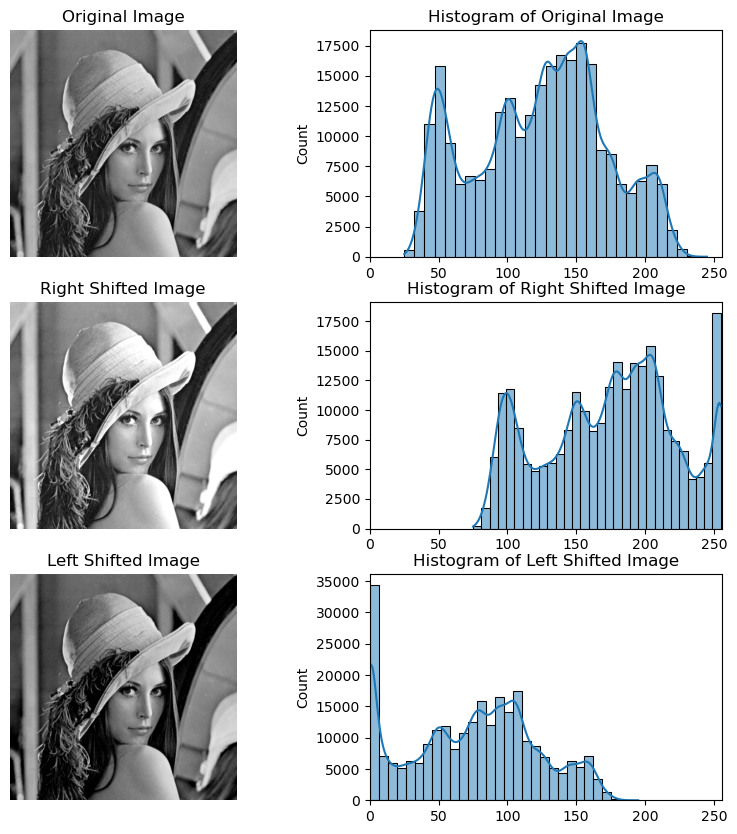

In [1]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def histogram_right_shift(image, shift_value=50):
  
    shifted = cv2.add(image, shift_value)
    
    return shifted

def histogram_left_shift(image, shift_value=-50):
    
    shifted = cv2.subtract(image, abs(shift_value))
    
    return shifted

image = cv2.imread("C:/Users/subha/Downloads/lena_rgb.png")  

gray_image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

shifted_image_right = histogram_right_shift(gray_image)

shifted_image_left = histogram_left_shift(gray_image)

plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
plt.imshow(gray_image,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 2)
sns.histplot(gray_image.ravel(),bins=30,kde=True)
plt.title('Histogram of Original Image')
plt.xlim([0,256])

plt.subplot(3, 2, 3)
plt.imshow(shifted_image_right,cmap='gray')
plt.title('Right Shifted Image')
plt.axis('off')

plt.subplot(3, 2, 4)
sns.histplot(shifted_image_right.ravel(),bins=30,kde=True)
plt.title('Histogram of Right Shifted Image')
plt.xlim([0,256])

plt.subplot(3,2,5)
plt.imshow(shifted_image_left, cmap='gray')
plt.title('Left Shifted Image')
plt.axis('off')

plt.subplot(3, 2, 6)
sns.histplot(shifted_image_left.ravel(),bins=30,kde=True)
plt.title('Histogram of Left Shifted Image')
plt.xlim([0,256])



plt.show()



### Histogram strecthing

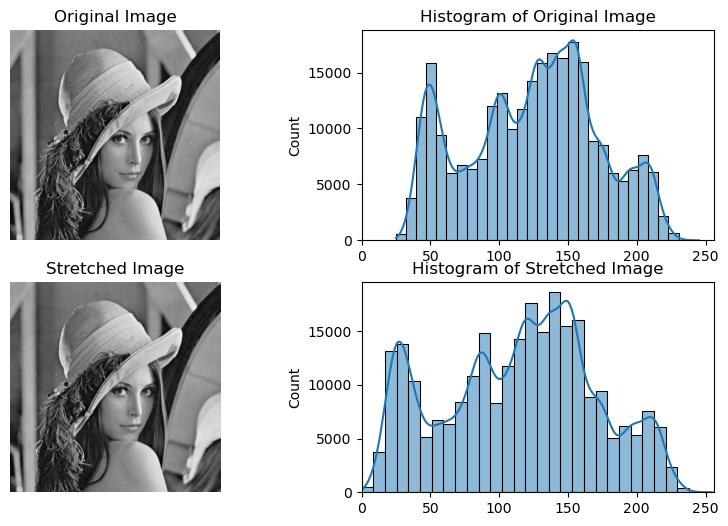

In [2]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def histogram_stretch(image):
    
    min_pixel = np.min(image)
    max_pixel = np.max(image)
    
    stretched = ((image - min_pixel) / (max_pixel - min_pixel) * 255).astype(np.uint8)
    
    return stretched

image = cv2.imread("C:/Users/subha/Downloads/lena_rgb.png")  

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

stretched_image = histogram_stretch(gray_image)

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
sns.histplot(gray_image.ravel(), bins=30, kde=True)
plt.title('Histogram of Original Image')
plt.xlim([0, 256])

plt.subplot(2, 2, 3)
plt.imshow(stretched_image, cmap='gray')
plt.title('Stretched Image')
plt.axis('off')

plt.subplot(2, 2, 4)
sns.histplot(stretched_image.ravel(), bins=30, kde=True)
plt.title('Histogram of Stretched Image')
plt.xlim([0, 256])

plt.show()



### Histogram Thresholding

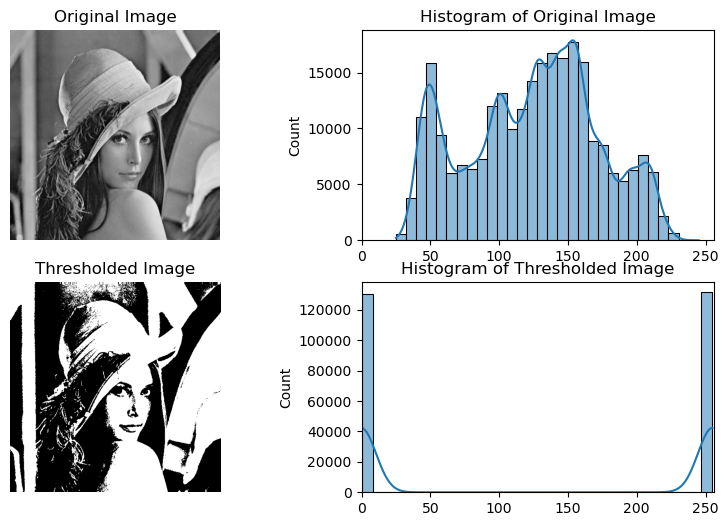

In [49]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def histogram_threshold(image, threshold_value=128):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    _, thresholded = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    
    return thresholded

image = cv2.imread("C:/Users/subha/Downloads/lena_rgb.png")  

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thresholded_image = histogram_threshold(gray_image)

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
sns.histplot(gray_image.ravel(), bins=30, kde=True)
plt.title('Histogram of Original Image')
plt.xlim([0, 256])

plt.subplot(2, 2, 3)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.subplot(2, 2, 4)
sns.histplot(thresholded_image.ravel(), bins=30, kde=True)
plt.title('Histogram of Thresholded Image')
plt.xlim([0, 256])

plt.show()



### Negative Image

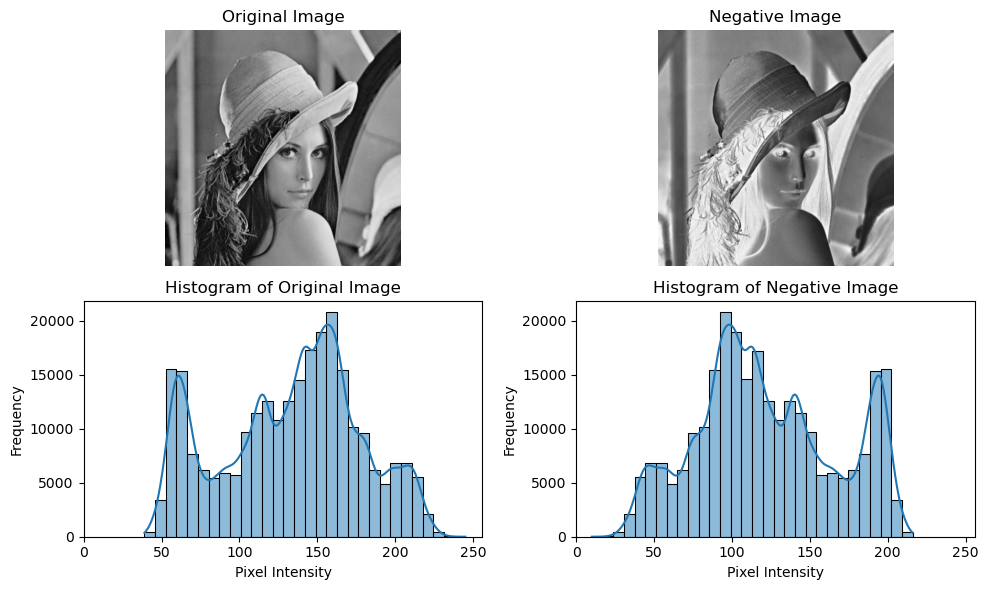

In [50]:
import cv2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("C:/Users/subha/Downloads/lena_rgb.png",0)  

negative_image = 255 - image

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1) 
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off') 

plt.subplot(2, 2, 2) 
plt.imshow(negative_image, cmap='gray')
plt.title('Negative Image')
plt.axis('off')  

plt.subplot(2, 2, 3)
sns.histplot(image.ravel(), bins=30,kde=True)
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0,256])

plt.subplot(2, 2, 4)
sns.histplot(negative_image.ravel(), bins=30,kde=True)
plt.title('Histogram of Negative Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0,256])


plt.tight_layout()  
plt.show()






### Histogram Equalization

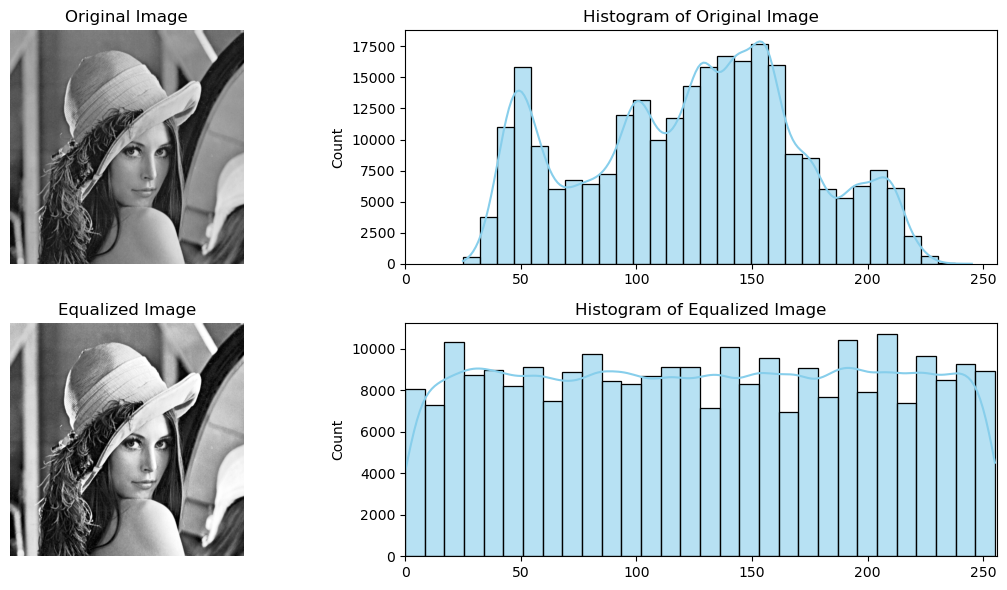

In [51]:
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

image = cv2.imread("C:/Users/subha/Downloads/lena_rgb.png")  

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


histogram, bins = np.histogram(gray_image.flatten(), bins=256, range=[0, 256])

cdf = histogram.cumsum()  
cdf_min = cdf.min() 
cdf_max = cdf.max() 

cdf_normalized = (cdf - cdf_min) * 255 / (cdf_max - cdf_min)
cdf_normalized = np.round(cdf_normalized).astype(np.uint8)  

equalized_image = cdf_normalized[gray_image] 

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(2, 2, 2)
sns.histplot(gray_image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
plt.title('Histogram of Original Image')
plt.xlim([0, 256])


plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')
plt.title('Equalized Image')

plt.subplot(2, 2, 4)
sns.histplot(equalized_image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
plt.title('Histogram of Equalized Image')
plt.xlim([0, 256])


plt.tight_layout()
plt.show()




### Discrete Fourier transform

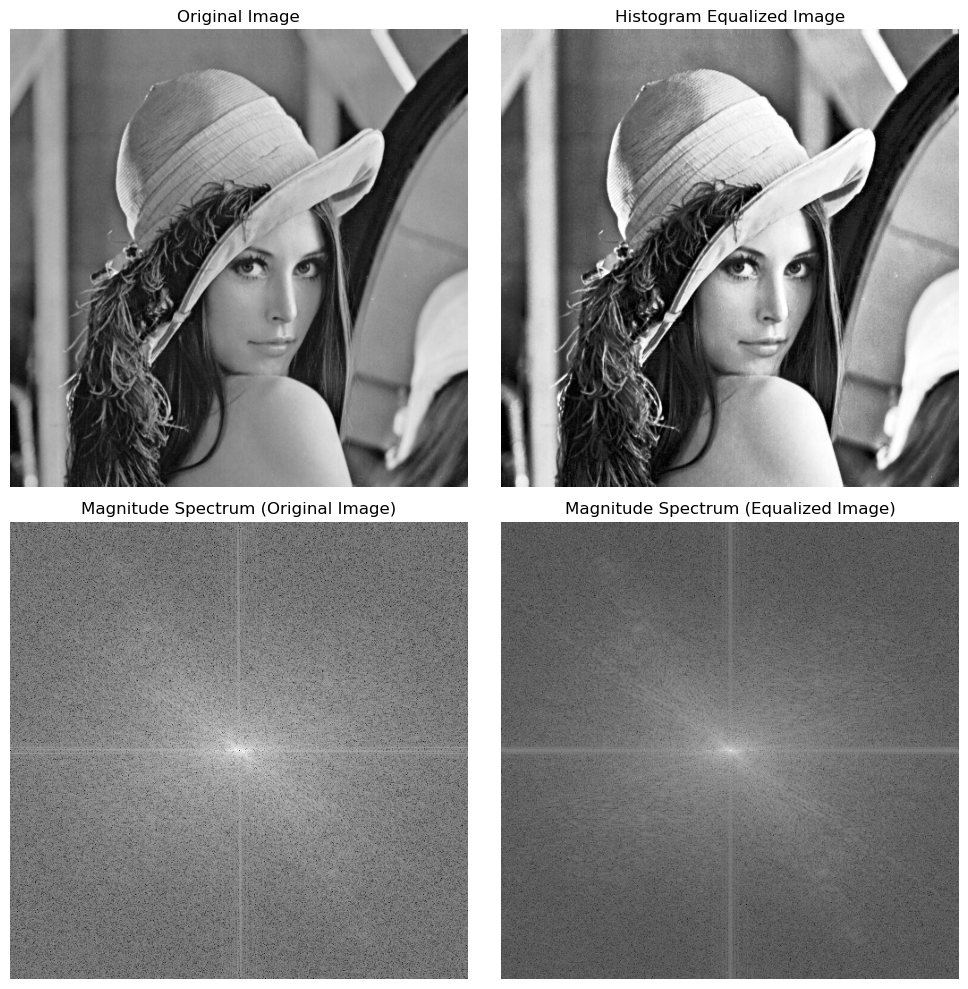

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("C:/Users/subha/Downloads/lena_rgb.png",0)  

equalized_image = cv2.equalizeHist(image)

dft = cv2.dft(np.float32(equalized_image), flags=cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(np.log(1 + np.fft.fftshift(np.abs(dft)))[:, :, 0], cmap='gray')
plt.title('Magnitude Spectrum (Original Image)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')  # Log scale for better visualization
plt.title('Magnitude Spectrum (Equalized Image)')
plt.axis('off')

plt.tight_layout()
plt.show()


### Blurring

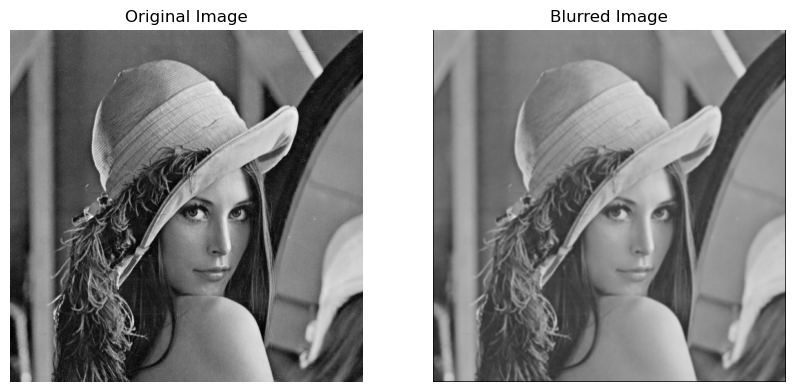

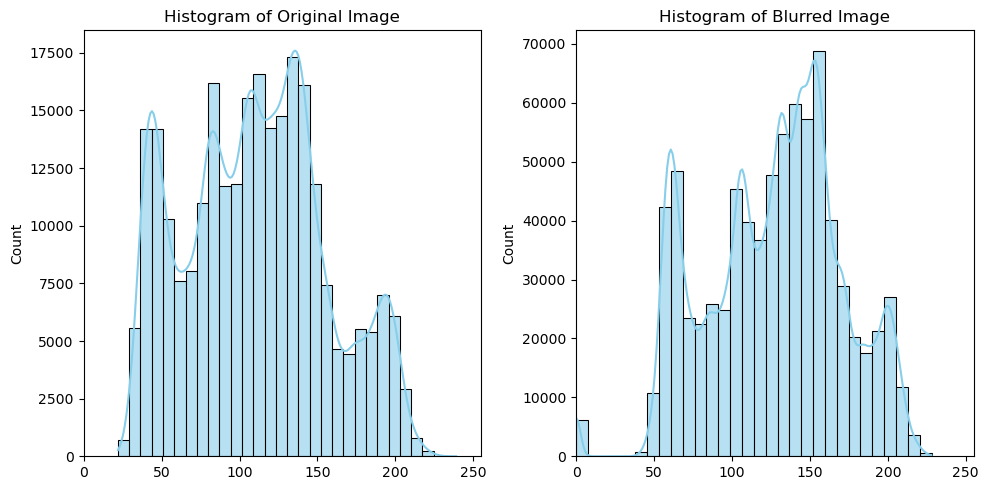

In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_blur(image):
    kernel_size = 3
    pad = kernel_size // 2
    blurre d = np.zeros_like(image, dtype=np.float32)
    for i in range(pad, image.shape[0] - pad):
        for j in range(pad, image.shape[1] - pad):
            region = image[i - pad:i + pad + 1, j - pad:j + pad + 1]
            blurred[i, j] = np.mean(region)
    return blurred.astype(np.uint8)

image = cv2.imread("C:/Users/subha/Downloads/lena_rgb.png")  

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred_image = image_blur(image_gray)

blurred_image = image_blur(image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_gray,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.axis('off')

plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(image_gray.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
plt.title("Histogram of Original Image")
plt.xlim(0, 255)
   
plt.subplot(1, 2, 2)
sns.histplot(blurred_image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
plt.title("Histogram of Blurred Image")
plt.xlim(0, 255)
plt.tight_layout()
plt.show()




### Sharpening

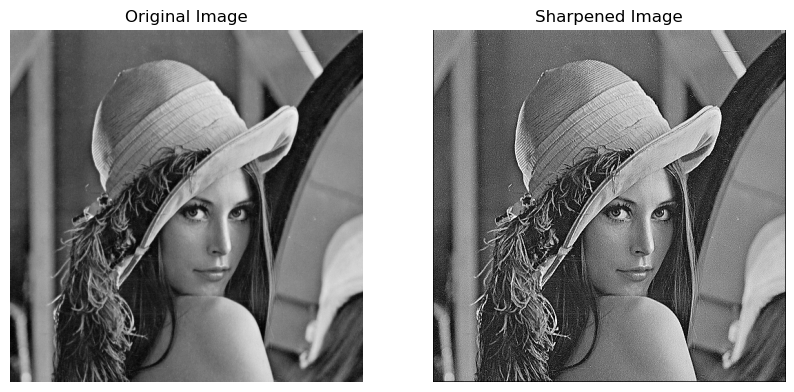

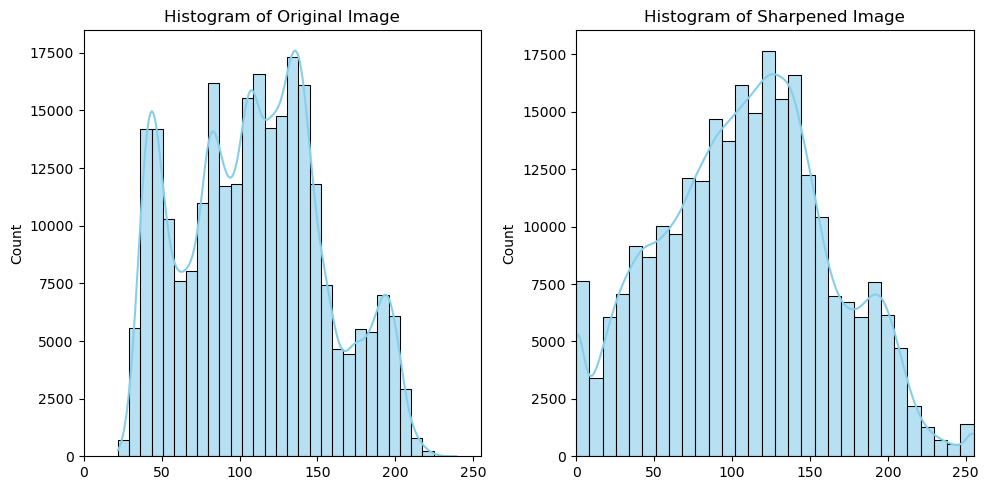

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_sharpen(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    pad = 1
    sharpened = np.zeros_like(image, dtype=np.float32)
    for i in range(pad, image.shape[0] - pad):
        for j in range(pad, image.shape[1] - pad):
            region = image[i - pad:i + pad + 1, j - pad:j + pad + 1]
            sharpened[i, j] = np.sum(region * kernel)
    return np.clip(sharpened, 0, 255).astype(np.uint8)

image = cv2.imread("C:/Users/subha/Downloads/lena_rgb.png")  

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sharpened_image = image_sharpen(image_gray)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_gray,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image,cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(image_gray.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
plt.title("Histogram of Original Image")
plt.xlim(0, 255)
   
plt.subplot(1, 2, 2)
sns.histplot(sharpened_image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
plt.title("Histogram of Sharpened Image")
plt.xlim(0, 255)
plt.tight_layout()
plt.show()



### Smoothening

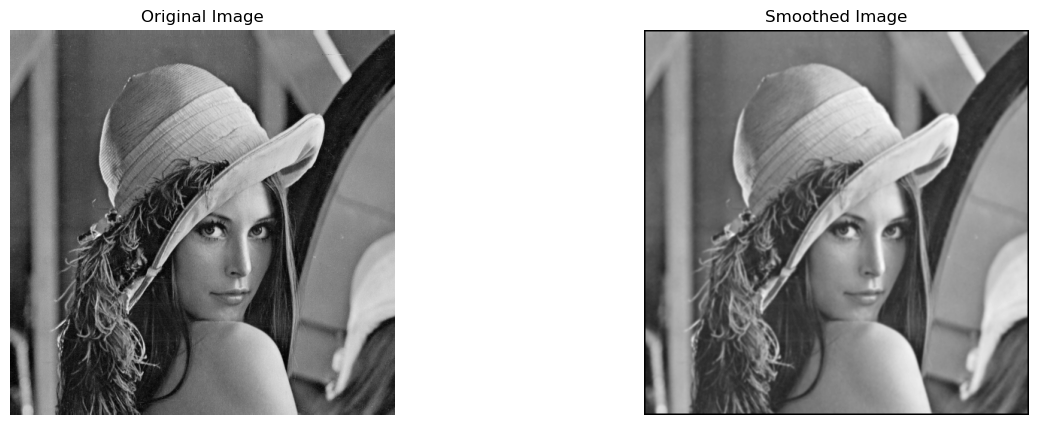

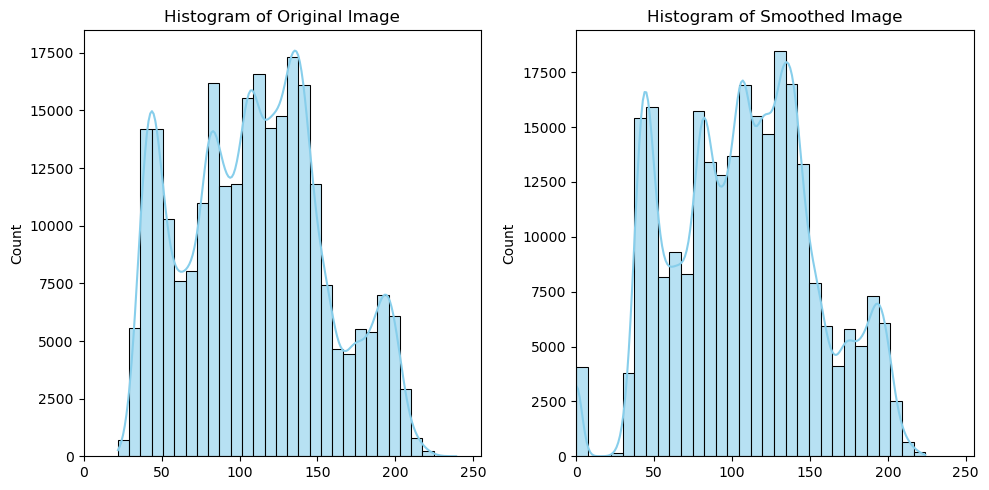

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def image_smooth(image, kernel_size=5, sigma=1.0):
    kernel = np.zeros((kernel_size, kernel_size), np.float32)
    center = kernel_size // 2
    for x in range(kernel_size):
        for y in range(kernel_size):
            kernel[x, y] = (1 / (2 * np.pi * sigma**2)) * np.exp(-((x - center)**2 + (y - center)**2) / (2 * sigma**2))
    kernel /= np.sum(kernel)  # Normalize the kernel to ensure the sum is 1
    pad = center
    smoothed = np.zeros_like(image, dtype=np.float32)
    for i in range(pad, image.shape[0] - pad):
        for j in range(pad, image.shape[1] - pad):
            region = image[i - pad:i + pad + 1, j - pad:j + pad + 1]
            smoothed[i, j] = np.sum(region * kernel)
    return smoothed.astype(np.uint8)

image = cv2.imread("C:/Users/subha/Downloads/lena_rgb.png")  
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

smoothed_image = image_smooth(image_gray)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')

plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(image_gray.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
plt.title("Histogram of Original Image")
plt.xlim(0, 255)

plt.subplot(1, 2, 2)
sns.histplot(smoothed_image.ravel(), bins=30, kde=True, color='skyblue', alpha=0.6)
plt.title("Histogram of Smoothed Image")
plt.xlim(0, 255)

plt.tight_layout()
plt.show()
